<h1>Relations between Social issues in Michigan</h1>

**by Maduka Balasooriya, Jeremy Potts, Derick Karolak**

In this study, we discuss what are the main social problems and how they effect in each county in Michigan. Also, we analyze the relationships between health problems and with social behaviors. As it would seem that a relationship between these two is commonly accepted perhaps even logical, however, comparing data allows for specific relationships to be identified. Once we start to see relations, we are then given the opportunity to dig further into the data.

The data obtain from:
<p><i>&emsp;&emsp;&emsp;https://healthdata.gov/dataset/community-health-status-indicators-chsi-combat-obesity-heart-disease-and-cancer/resource<br></i></p>

<p>We have used Pandas Python module for normalizing the data & both Python and matplotlib.pyplot for the analysis
The Data is attached to the workbook</p>


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

### Data pre-processing (Demographic Data, LeadingCauseOfDeath Data, PerventiveServicesUse Data, VunerablePopsAndenvHealth Data)###
 ### Data Cleaning:
   1. Applied filter to return only Michigan data as only Michigan data is relevant for this EDA
   2. Dropped un-wanted columns and make data easier to read
   3. Renamed columns
   
         -Added "_pct" to data that is a precentage
        
        -Removing need for a lookup table for column definitions
        
        -Converted A-F prefix to meaning and Appeneded to column name
        
   4. Replaced all null placeholders with NaN to allows easier data calculations
    
    
    
   Then, Join all dataframes together to look for relationships between datasets 
     
   -Remove unwanted columns after joining
   
   -Impute null values with column means

In [160]:
DEMO = pd.read_csv("DEMOGRAPHICS.csv")
demo_df = pd.DataFrame(DEMO)

#1 Define a boolean variable to filter the dataset
is_MI = demo_df['CHSI_State_Abbr']=='MI'
demo_df = demo_df[is_MI]

#1 Drop unwanted columns
demo_df = demo_df[demo_df.columns.drop(list(demo_df.filter(regex='Min'))).drop(list(demo_df.filter(regex='Max'))).drop(["Strata_ID_Number", "Strata_Determining_Factors"])]
#2 Rename columns to remove the need to lookup data meaning in seperate table
demo_df = demo_df.rename({'Poverty':'Poverty_pct', 'Age_19_Under':'Age_19_Under_pct', 'Age_19_64':'Age_19_64_pct',\
                          'Age_65_84':'Age_65_84_pct', 'White':'White_pct', 'Black':'Black_pct', 'Native_American':'Native_American_pct',\
                          'Asian':'Asian_pct', 'Hispanic':'Hispanic_pct'}, axis='columns')

#Display
#demo_df.describe()
#demo_df.max(axis=0)
#demo_df.info()
#demo_df.head(3)

In [161]:
cod_raw = 'LEADINGCAUSESOFDEATH.csv'
cod = pd.read_csv(cod_raw)
cod_df = pd.DataFrame(cod)

#1 Filter the table
cod_df = cod_df[is_MI]

#2 Drop unwanted columns
cod_df = cod_df[cod_df.columns.drop(list(cod_df.filter(regex='Min'))).drop(list(cod_df.filter(regex='Max'))).drop(["LCD_Time_Span"])]

#3 Rename Columns
cod_df = cod_df.rename(lambda x: x.replace('Comp', 'Birth_Comp_pct').replace('BirthDef', 'Birth_Def_pct'), axis='columns')\
                .rename(lambda x: x[2:] if x[:2]=='A_' else x , axis='columns')\
                .rename(lambda x: x[2:]+'_Age_1-14_pct' if x[:2]=='B_' else x , axis='columns')\
                .rename(lambda x: x[2:]+'_Age_15-24_pct' if x[:2]=='C_' else x , axis='columns')\
                .rename(lambda x: x[2:]+'_Age_15-24_pct' if x[:2]=='C_' else x , axis='columns')\
                .rename(lambda x: x[2:]+'_Age_25-44_pct' if x[:2]=='D_' else x , axis='columns')\
                .rename(lambda x: x[2:]+'_Age_45-64_pct' if x[:2]=='E_' else x , axis='columns')\
                .rename(lambda x: x[2:]+'_Age_65+_pct' if x[:2]=='F_' else x , axis='columns')

#4 Replace null placeholders with NaN
cod_df = cod_df.replace(-1111, np.NaN).replace(-1111.1, np.NaN).replace(-1, np.NaN)\
                .replace(-2222, np.NaN).replace(-2222.2, np.NaN).replace(-2, np.NaN)\
                .replace(-9999, np.NaN).replace(-9998.9, np.NaN)

#Display
#cod_df.describe()
#cod_df.max(axis=0)
#cod_df.info()
#od_df.head(3)

In [162]:
prev_raw = 'PREVENTIVESERVICESUSE.csv'
prev = pd.read_csv(prev_raw)
prev_df = pd.DataFrame(prev)

#1 Filter the table
prev_df = prev_df[is_MI]

#2 Drop unwanted columns
prev_df = prev_df[prev_df.columns.drop(list(prev_df.filter(regex='Min'))).drop(list(prev_df.filter(regex='Max')))\
                  .drop(list(prev_df.filter(regex='Ind'))).drop(list(prev_df.filter(regex='Exp'))).drop(["ID_Time_Span"])]

#3 Rename Columns
prev_df = prev_df.rename({'Pap_Smear':'Pap_Smear_pct', 'Mammogram':'Mammogram_pct', 'Proctoscopy':'Proctoscopy_pct',\
                          'Pneumo_Vax':'Pneumo_Vax_pct', 'Flu_Vac':'Flu_Vac_pct'}, axis='columns')

#4 Replace null placeholders with NaN
prev_df = prev_df.replace(-1111, np.NaN).replace(-1111.1, np.NaN).replace(-1, np.NaN)\
               .replace(-2222, np.NaN).replace(-2222.2, np.NaN).replace(-2, np.NaN)\
               .replace(-9999, np.NaN).replace(-9998.9, np.NaN)

#Display
#prev_df.describe()
#prev_df.info()
#prev_df.max(axis=0)
#prev_df.head(3)

In [163]:
risk_raw = 'RISKFACTORSANDACCESSTOCARE.csv'
risk = pd.read_csv(risk_raw)
risk_df = pd.DataFrame(risk)

#1 Filter the table
risk_df = risk_df[is_MI]

#2 Drop unwanted columns
risk_df = risk_df[risk_df.columns.drop(list(risk_df.filter(regex='Min'))).drop(list(risk_df.filter(regex='Max')))\
                  .drop(list(risk_df.filter(regex='Ind'))).drop(list(risk_df.filter(regex='Exp'))).drop(["Strata_ID_Number"])]
#3 Rename Columns
risk_df = risk_df.rename({'No_Exercise':'No_Exercise_pct', 'Few_Fruit_Veg':'Few_Fruit_Veg_pct', 'Obesity':'Obesity_pct',\
                          'High_Blood_Pres':'High_Blood_Pres_pct', 'Smoker':'Smoker_pct', 'Diabetes':'Diabetes_pct'}, axis='columns')

#4 Replace null placeholders with NaN
risk_df = risk_df.replace(-1111, np.NaN).replace(-1111.1, np.NaN).replace(-1, np.NaN)\
               .replace(-2222, np.NaN).replace(-2222.2, np.NaN).replace(-2, np.NaN)\
               .replace(-9999, np.NaN).replace(-9998.9, np.NaN)

#Display
#risk_df.describe()
#risk_df.info()
#risk_df.max(axis=0)
#risk_df.head(3)

In [164]:
env_raw = 'VUNERABLEPOPSANDENVHEALTH.csv'
env = pd.read_csv(env_raw)
env_df = pd.DataFrame(env)

#1 Filter the table
env_df = env_df[is_MI]

#2 Drop unwanted columns
env_df = env_df[env_df.columns.drop(list(env_df.filter(regex='Ind'))).drop(list(env_df.filter(regex='Exp'))).drop(["EH_Time_Span", "Strata_ID_Number"])]

#3 Rename Columns
env_df = env_df.rename({'Salm_Rpt':'Salmonella_Cases', 'Ecol_Rpt':'Ecoli_Cases', 'Shig_Rpt':'Shigella_Cases',\
                          'Toxic_Chem':'Toxic_Chems_Released(Unknown_Units)'}, axis='columns')

#4 Replace null placeholders with NaN
env_df = env_df.replace(-1111, np.NaN).replace(-1111.1, np.NaN).replace(-1, np.NaN)\
                .replace(-2222, np.NaN).replace(-2222.2, np.NaN).replace(-2, np.NaN)\
                .replace(-9999, np.NaN).replace(-9998.9, np.NaN)

#Display
#env_df.describe()
#env_df.max(axis=0)
#env_df.info()
#env_df.head(3)

In [165]:
#1 Join all dataframes together to look for relationships between datasets
all_df = demo_df.merge(env_df,on='County_FIPS_Code').merge(risk_df,on='County_FIPS_Code').merge(prev_df,on='County_FIPS_Code').merge(cod_df,on='County_FIPS_Code')

#display
#all_df.describe()
#all_df.info()
#all_df.head(5)
#all_df.describe().plot()
#all_df.shape

In [166]:
#Drop unwanted, duplicated columns
all_df = all_df.drop(['CHSI_State_Name_x','State_FIPS_Code_y','CHSI_County_Name_y','CHSI_State_Name_y','CHSI_State_Abbr_y','State_FIPS_Code_x'
                      ,'CHSI_County_Name_x','CHSI_State_Name_x','CHSI_State_Abbr_x','CHSI_County_Name_y','CHSI_State_Name_y','CHSI_State_Abbr_y',
                      'Strata_ID_Number_y'], axis=1)


In [167]:
#all_df.describe()
#all_df.info()
#all_df.head(5)

In [168]:
#combine information of Native american and asian together as other ethnicity group
all_df['other_pct'] = all_df['Native_American_pct'] + all_df['Asian_pct'] 

In [169]:
#fill null with column means
all_df.fillna(all_df.mean(), inplace=True)
#print(all_df.isnull().sum())
all_df.head(3)

,County_FIPS_Code,Number_Counties,Population_Size,Population_Density,Poverty_pct,Age_19_Under_pct,Age_19_64_pct,Age_65_84_pct,Age_85_and_Over,White_pct,...,Hi_HeartDis_Age_45-64_pct,Wh_HeartDis_Age_65+_pct,Bl_HeartDis_Age_65+_pct,Ot_HeartDis_Age_65+_pct,Hi_HeartDis_Age_65+_pct,Wh_Cancer_Age_65+_pct,Bl_Cancer_Age_65+_pct,Ot_Cancer_Age_65+_pct,Hi_Cancer_Age_65+_pct,other_pct
0,1,32,11653,17,11.9,17.3,55.7,23.6,3.3,98.3,...,21.125,31,32.409091,30.6,30.111111,23,22.5,24.6,22.625,0.9
1,3,48,9662,11,10.1,18.8,63.4,15.1,2.7,88.0,...,21.125,38,32.409091,30.6,30.111111,21,22.5,24.6,22.625,4.0
2,5,57,113174,137,8.4,27.2,61.7,9.7,1.5,96.4,...,21.125,31,35.000000,30.6,19.000000,21,19.0,24.6,22.625,1.3


**Health Issues**

First of all, let's check how the most common health issues vary with ethnicity, daily activities and care in the population of Michigan.
What is the correlation between diabetes, high blood pressure with ethnicity, obesity? We use a heat map to identify the possible relationships.

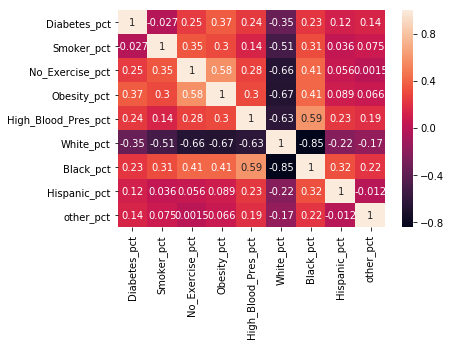

In [170]:
from sklearn.preprocessing import Normalizer
subset = all_df[['Diabetes_pct','Smoker_pct','No_Exercise_pct','Obesity_pct','High_Blood_Pres_pct','White_pct','Black_pct','Hispanic_pct','other_pct']]
normalized_df = Normalizer().fit_transform(subset)

corr = pd.DataFrame(normalized_df).corr()

sns.heatmap(corr, annot=True,
        xticklabels=subset.columns.values,
        yticklabels=subset.columns.values)

There appears to be a high correlation between obesity and the percentage of those who do not exercise in each county.
There is a negative correlation between the white population to some health problems and a positive correlation to the black population with different risks.

As further analysis, let's see how obesity and lack of excercise plays a role on the occurance of diabetes.
First, let's see the box plot of the diabetes percentage in each county so as to identify a summary of statistics.

Average percentage of people who suffer with diebetesea in Michigan:  7.992105263157893
Median percentage of people who suffer with diebetesea in Michigan :  7.992105263157893


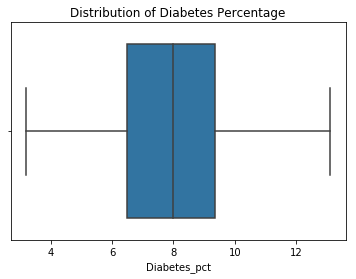

In [171]:
g1= sns.boxplot(all_df['Diabetes_pct'])
g1.set(xlabel='Diabetes_pct')
g1.set_title('Distribution of Diabetes Percentage')
print("Average percentage of people who suffer with diebetesea in Michigan: ", all_df['Diabetes_pct'].mean())
print("Median percentage of people who suffer with diebetesea in Michigan : ", all_df['Diabetes_pct'].median())

We can see average around 8% of people in Michigan suffer with Diabetes.

Next, we explore how health risk factors (such as obesity and lack of excercise) effect the occurance of diabetes.

Text(0.5,1,'Obesity vs Diabetes')

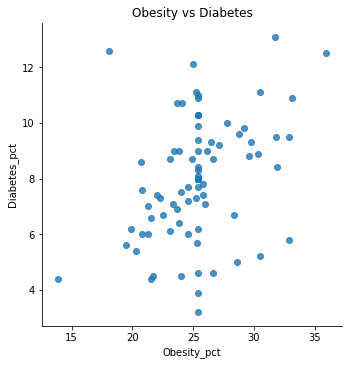

In [172]:
sns.lmplot(x='Obesity_pct',y='Diabetes_pct',  data=all_df,
          fit_reg=False)
ax = plt.gca()
ax.set_title("Obesity vs Diabetes")

Text(0.5,1,'Obesity vs No_excercise%')

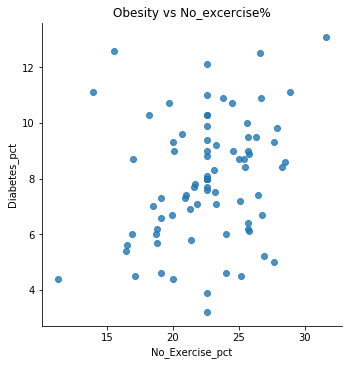

In [173]:
sns.lmplot(x='No_Exercise_pct',y='Diabetes_pct',  data=all_df,
          fit_reg=False)
ax = plt.gca()
ax.set_title("Obesity vs No_excercise%")

Here we see that there is a positive relationship between risk factors and diabetes. However, it is not a strong relationship.

An interesting observation made from the heat map above is the apparent effect ethnicity has on health problems. It is possible that this is due to ethnicity proportion changes around the state of Michigan. So, let's see the percentage of ethnicity in Michigan.

In [174]:
all_df['Black']= all_df['Black_pct'] * all_df['Population_Size'] 
all_df['White']=all_df['White_pct'] * all_df['Population_Size']
all_df['Hispanic']=all_df['Hispanic_pct'] * all_df['Population_Size']
all_df['Other']=all_df['other_pct'] * all_df['Population_Size']
Ethnic= all_df[['Black','White','Hispanic','Other']]


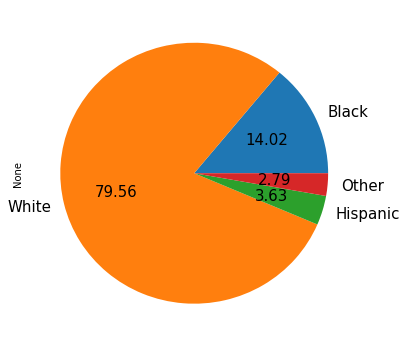

In [175]:
count = pd.Series([all_df.Black.sum(), all_df.White.sum(),all_df.Hispanic.sum(),all_df.Other.sum()],index=['Black', 'White','Hispanic','Other'])
pie = count.plot.pie(  autopct='%.2f',fontsize=15, figsize=(6, 6))


Let's move to another health focused analysis. How depression might have an effect on people.

Text(0.5,1,'Population size vs Major_Depression')

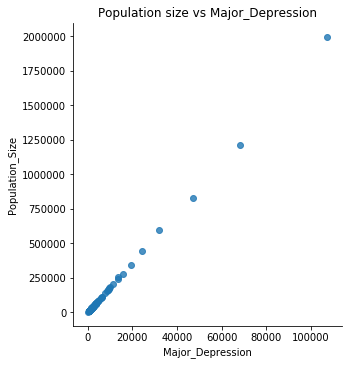

In [176]:
sns.lmplot(x='Major_Depression', y='Population_Size', data=all_df,
          fit_reg=False)
ax = plt.gca()
ax.set_title("Population size vs Major_Depression")

Here we see the apparent increase of depression as the population of area increases.

Lets see how depression population distribute around counties.

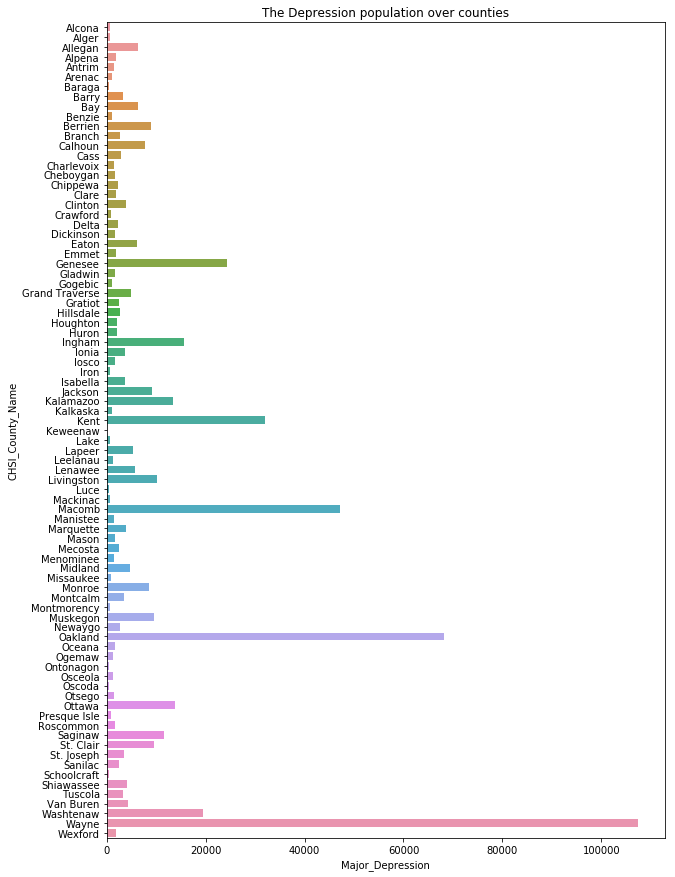

In [177]:
p = plt.figure(figsize=(10,15))
ax = sns.barplot(x="Major_Depression", y ="CHSI_County_Name", orient='h',  data= all_df)
ax.set( title = 'The Depression population over counties')
plt.show()

It is clear that Majority of depressed people live in wayne county ( Detroit city area)

**Social Issues**

Let's see how Depression effects the occurance of Suicide. Is there any correlation between them?
We use a scatter plot to analyse this.

Text(0.5,1,'Suicide vs Major_Depression')

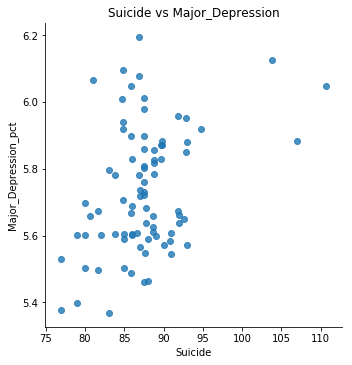

In [178]:
all_df['Major_Depression_pct']=all_df['Major_Depression']/all_df['Population_Size']*100
all_df['SuicideA']= all_df['Wh_Suicide_Age_15-24_pct'] + all_df['Bl_Suicide_Age_15-24_pct'] +  all_df['Hi_Suicide_Age_15-24_pct']
all_df['SuicideB']= all_df['Wh_Suicide_Age_25-44_pct']+ all_df['Bl_Suicide_Age_25-44_pct']+ all_df['Ot_Suicide_Age_25-44_pct']
all_df['Suicide']=all_df['SuicideA']+ all_df['SuicideB']

all_df[all_df['Suicide'] < 100]
sns.lmplot(x='Suicide',y='Major_Depression_pct',  data=all_df,
          fit_reg=False)
ax = plt.gca()
ax.set_title("Suicide vs Major_Depression")


Reviewing this graph, it seems that there is a positive relationship between the percentage of people who commit suicide and the percentage of people who suffer with depression in each county.

Another major social issue is Drug usage in Michigan.

Lets analyse how drug usage affect on each county

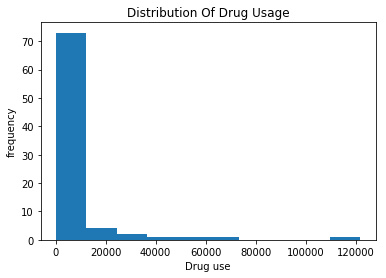

In [179]:
plt.hist(all_df.Recent_Drug_Use)
plt.title('Distribution Of Drug Usage')
plt.xlabel("Drug use")
plt.ylabel("frequency")
plt.show()


It is clear that Most of cities have few drug use except one county. Lets further dig further.

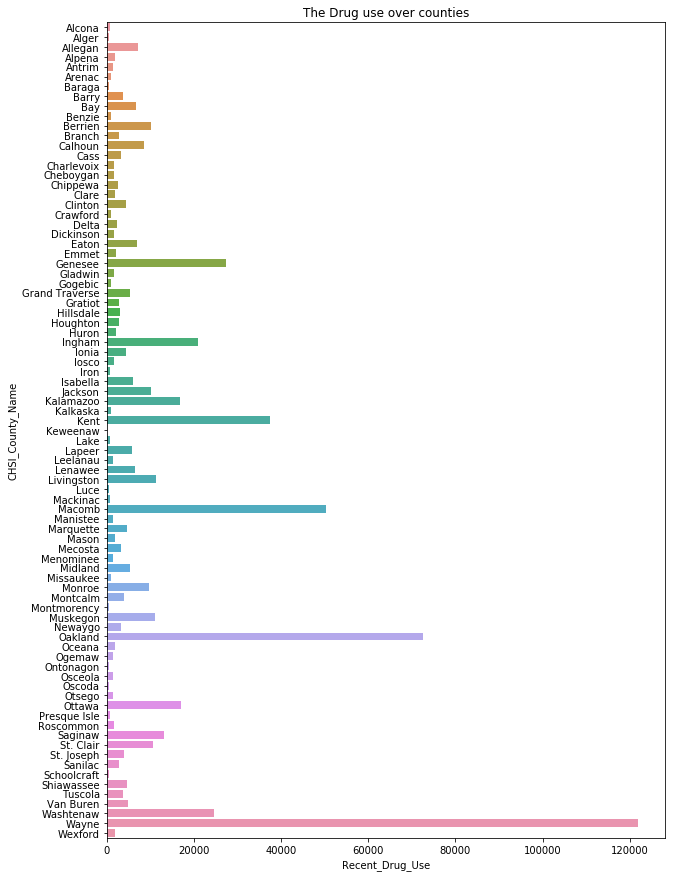

In [180]:
p = plt.figure(figsize=(10,15))
ax = sns.barplot(x="Recent_Drug_Use", y ="CHSI_County_Name", orient='h',  data= all_df)
ax.set( title = 'The Drug use over counties')
plt.show()

Wayne county has the highest drug use in Michigan.

Let's see the relationship between drug use and unemployment.

Text(0.5,1,'Drug use vs Unemployment')

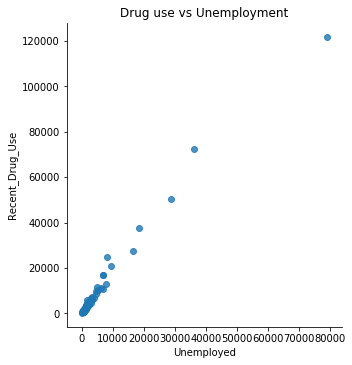

In [181]:
sns.lmplot(x='Unemployed',y='Recent_Drug_Use', data=all_df,
          fit_reg=False)
ax = plt.gca()
ax.set_title("Drug use vs Unemployment")

Here we see that drug use has an increased occurance with unemployment. So, we can make another conclusion that Unemployment is highest in wayne county.

Now, we look at population size of a county and if it has a relationship with percentage of poverty in that county.

Text(0.5,1,'Poverty vs Population size')

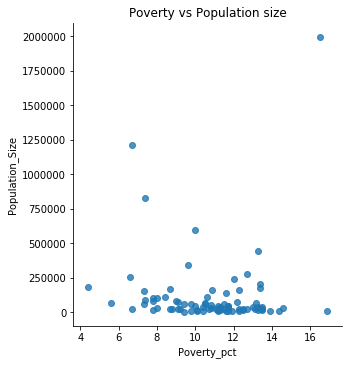

In [182]:
sns.lmplot(x='Poverty_pct', y='Population_Size', data=all_df,
          fit_reg=False)
ax = plt.gca()
ax.set_title("Poverty vs Population size")

There does not seem to be a correlation between poverty and the population size of a county. We see that most counties have about the same or similar size of population, yet the percentage of poverty spans the a majority of the graph. However, we do see an outlier. The county with highest population has a very high percentage of poverty.


**Conclusion**

Health issues

* There is a high correlation between obesity and the percentage of those who do not exercise in each county.
* There is a negative correlation between the white population to some health problems and a positive correlation to the black population with different     risks.
* Obesity and lack of excercise plays a role on the occurance of diabetes.

Social issues

* Majority of depressed people live in wayne county (Detroit city area).
* There is a positive relationship between the percentage of people who commit suicide and the percentage of people who suffer with depression in each county.
* Wayne county has the highest drug use in Michigan.
* Drug use has an increased occurance with unemployment



Certainly, there is much to be researched and learned from analyzing this data. The deeper we dig into the data, the more relationships we find. More importantly, conclusions without data may result in incorrect perceptions of people groups. When there is data, we can show relationships.